In [132]:
# # pip3 install feedparser
# import feedparser

# url = 'https://e00-elmundo.uecdn.es/elmundo/rss/espana.xml'
# feed = feedparser.parse(url)

# # for entry in feed.entries:
# #     print('Title:', entry.title)
# #     print('Link:', entry.link)
# #     print('Summary:', entry.summary)
# #     print('Published:', entry.published)
# #     print('-' * 40)

# len(feed.entries)

https://www.kaggle.com/datasets/josemamuiz/noticias-laraznpblico

58424 news were extracted from La Razón (31477) and Público (26948). Categories were: Economy, Equality, Politics, Spain and Culture.

/home/jips/datos/data_larazon_publico_v2.csv

In [133]:
# Scrapper en Python que descargue las noticias del periodico online de El Mundo en un dataset con una columna "full" que contenga el título y cuerpo de la noticia.

if (0):
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd

    # Definir la URL del periódico y las secciones que se van a analizar
    base_url = "https://www.elmundo.es/"
    sections = ["espana.html", "internacional.html", "economia.html"]

    # Definir la lista vacía para almacenar los datos
    news_data = []

    # Para cada sección, obtener los enlaces a las noticias y extraer los títulos y cuerpos de las noticias
    for section in sections:
        url = base_url + section
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        articles = soup.find_all('article')
        for article in articles:
            try:
                link = article.find('a')['href']
                news_page = requests.get(link)
                news_soup = BeautifulSoup(news_page.content, 'html.parser')
                title = news_soup.find('h1', class_='ue-c-article__headline').get_text()
                body = news_soup.find('div', class_='ue-c-article__body').get_text()
                news_data.append({'full': title + ' ' + body})
            except:
                pass

    # Convertir la lista de noticias en un conjunto de datos (dataset) de pandas y exportarlo a un archivo CSV
    news_df = pd.DataFrame(news_data)
    news_df.to_csv('el_mundo_news.csv', index=False)

## LAB: La maldición de la dimensionalidad

Para entender el efecto de la cantidad de dimensiones en la capacidad predictiva del modelo vamos a trabajar en un clasificador de noticias de dos diarios españoles para intentar distinguir entre uno y otro a partir del vocabulario que utilizan. <br />

Para esto vamos a implementar un modelo de tipo Naïve Bayes con vectorización de tipo TF-IDF.

## 1.1 Limpieza y estandarización

In [134]:
import pandas as pd
df_elMundo = pd.read_csv('el_mundo_news.csv')
df_elMundo['class'] = 0
df_elMundo

,full,class
0,Feijóo lamenta que Sánchez mantenga a Montero ...,0
1,El PP se niega a negociar la renovación del CG...,0
2,El PSOE cree que Podemos ya ve ganador a Feijó...,0
3,Los mil pedazos de 'indignados' y 'mareas' que...,0
4,El 'popular' Azcón ofrece su voto a Lambán si ...,0
...,...,...
178,El peligro de tener solo una cuenta corriente ...,0
179,Bruselas inspecciona por sorpresa a la empresa...,0
180,Dos de cada tres hogares de renta baja con fam...,0
181,El tope a los precios de los alimentos fracasa...,0


In [135]:
df_publico = pd.read_csv('/home/jips/datos/data_larazon_publico_v2.csv')
df_publico['class'] = 1
df_publico['full'] = df_publico['cuerpo'] + df_publico['titular']
df_publico = df_publico[["full", "class"]].copy()
df_publico = df_publico[:200].copy()
df_publico

,full,class
0,dos semanas después de su puesta de largo y pr...,1
1,"este viernes, el presidente del gobierno, pedr...",1
2,"el ministro del interior, fernando grande-marl...",1
3,son días muy duros para la familia de olivia y...,1
4,sólo quedan 10 presos de eta por recibir los b...,1
...,...,...
195,cuando se asoma a la puerta de la sede de vox ...,1
196,el ministerio español de ciencia e innovación ...,1
197,los prejuicios son la mayor barrera de las per...,1
198,"a la expectativa, resolviendo a toda prisa y s...",1


In [136]:
df = pd.concat([df_elMundo, df_publico])

In [137]:
df.sample(5)

,full,class
51,Detienen a un hombre por obligar a su mujer a ...,0
138,El banco First Citizens comprará todos los dep...,0
115,China celebra su propia cumbre de la democraci...,0
171,"Ukio, Ecodicta, Trucksters, Ucademy... ¿Es Esp...",0
19,¿qué pasará el 9 de mayo?españa.un informe int...,1


## 1.2 Filtrado de noticias relevantes

Para mejorar la clasificación es conveniente retirar las secciones donde los dos diarios utilizan un vocabulario similar y muy específico del dominio como, por ejemplo, las relacionadas con los deportes.

In [138]:
df['full'].value_counts()

los prejuicios son la mayor barrera de las personas con discapacidad. la inclusión laboral ya era una de las asignaturas pendientes del mercado laboral y de las administraciones españolas antes de la pandemia, con una tasa de paro del 24% para las personas con discapacidad en 2019, 8 puntos por encima de la media nacional actual. tras el paso de esta devastadora crisis, este colectivo se encuentra con más puertas cerradas que antes y con menores posibilidades de lograr la libertad financiera que los sitúe en una posición de igualdad.maría josé, astrid o xavier ayudan a poner rostro a los 3,8 millones de personas con discapacidad que hay en españa, de los cuales 1,87 millones estaban en edad de trabajar en 2019, según datos del ine. en concreto, una de cada tres familias tiene a algún integrante con capacidades diferentes, señala albert campabadal, presidente del consejo español para la defensa de la discapacidad y la dependencia (ceddd).la crisis ha supuesto una estocada mortal para la

In [139]:
# Filtramos las noticias relacionadas a deportes
df = df[df['full'].str.lower().str.contains('deportes')==False].copy()

In [140]:
df['full'].value_counts()

los prejuicios son la mayor barrera de las personas con discapacidad. la inclusión laboral ya era una de las asignaturas pendientes del mercado laboral y de las administraciones españolas antes de la pandemia, con una tasa de paro del 24% para las personas con discapacidad en 2019, 8 puntos por encima de la media nacional actual. tras el paso de esta devastadora crisis, este colectivo se encuentra con más puertas cerradas que antes y con menores posibilidades de lograr la libertad financiera que los sitúe en una posición de igualdad.maría josé, astrid o xavier ayudan a poner rostro a los 3,8 millones de personas con discapacidad que hay en españa, de los cuales 1,87 millones estaban en edad de trabajar en 2019, según datos del ine. en concreto, una de cada tres familias tiene a algún integrante con capacidades diferentes, señala albert campabadal, presidente del consejo español para la defensa de la discapacidad y la dependencia (ceddd).la crisis ha supuesto una estocada mortal para la

## 1.3 Normalización del texto

Primero es conveniente pasar todo el corpus a letras minúsculas.

Para mejorar el clasificador es importante sacar todos los acentos que pueden generar diferencias artificiales entre palabras según estén o no puestos. Hint: Utilizar el módulo unidecode

Una vez retirados los acentos, quitar todos los signos de puntuación para dejar únicamente palabras. Hint: utilizar una expresión regular, por ejemplo, r'([^\s\w]|_)+' para reemplazar todo lo que no sean palabras.

In [141]:
df['full'] = df['full'].str.lower()

In [142]:
# pip3 install unidecode
from unidecode import unidecode
df['full'] = df['full'].apply(unidecode)

In [143]:
df['full'].sample(3)

149    el ine confirma que la economia crecio un 5,5%...
89     memorable victoria de ayuso e historico bataca...
107    guerra ucrania - rusia, ultima hora | ucrania ...
Name: full, dtype: object

In [144]:
import re
df['full'] = df['full'].apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))

In [145]:
df['full'].sample(3)

121    el estado de alarma termina el proximo domingo...
33     como salvar un piano de 1904 desde un pueblo d...
16     detienen a un hombre que retuvo a una mujer de...
Name: full, dtype: object

## 2. Modelo

Vectorizar el corpus resultante con TF-IDF y aplicar un modelo Naive Bayes con un split simple entre train y test. 

¿Cuál es la dimensión de la matriz de features? ¿Cuál es el accuracy obtenido?

Dibujar la matriz de confusión.

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['full'], df['class'], test_size=0.33, random_state=42) 

In [147]:
# Sólo para chequear el tamaño de la matriz de features
from sklearn.feature_extraction.text import TfidfVectorizer

m1 = TfidfVectorizer()
X_train_vec = m1.fit_transform(X_train)
X_train_vec.shape

(253, 16986)

In [148]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [149]:
model.fit(X_train, y_train)
labels = model.predict(X_test)

In [150]:
labels

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [151]:
import numpy as np

# Contar los valores distintos de cero en el array
num_distinct = np.count_nonzero(labels)

# Imprimir el número de valores distintos de cero
print("Número de valores distintos de cero:", num_distinct)
print("Número total de valores:", len(labels))

Número de valores distintos de cero: 96
Número total de valores: 126


In [152]:
y_test

109    1
104    1
148    1
146    0
55     0
      ..
78     1
22     1
19     0
81     1
79     0
Name: class, Length: 126, dtype: int64

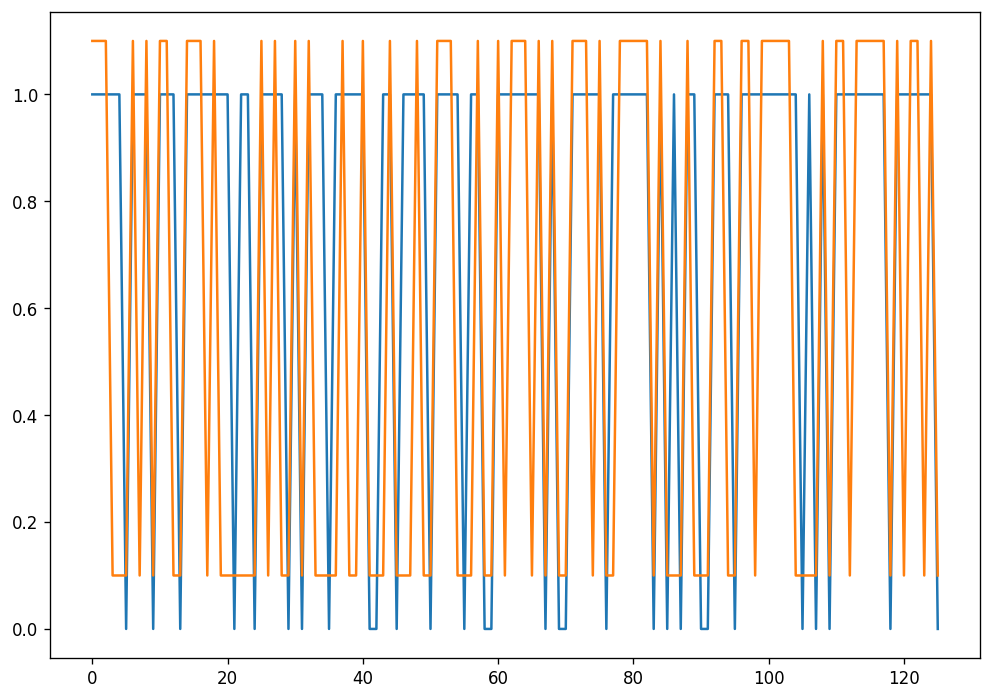

In [153]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

plt.plot(labels)
plt.plot(y_test.values + 0.1)
plt.show()

In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels)

0.7222222222222222

Text(255.26666666666674, 0.5, 'predicted label')

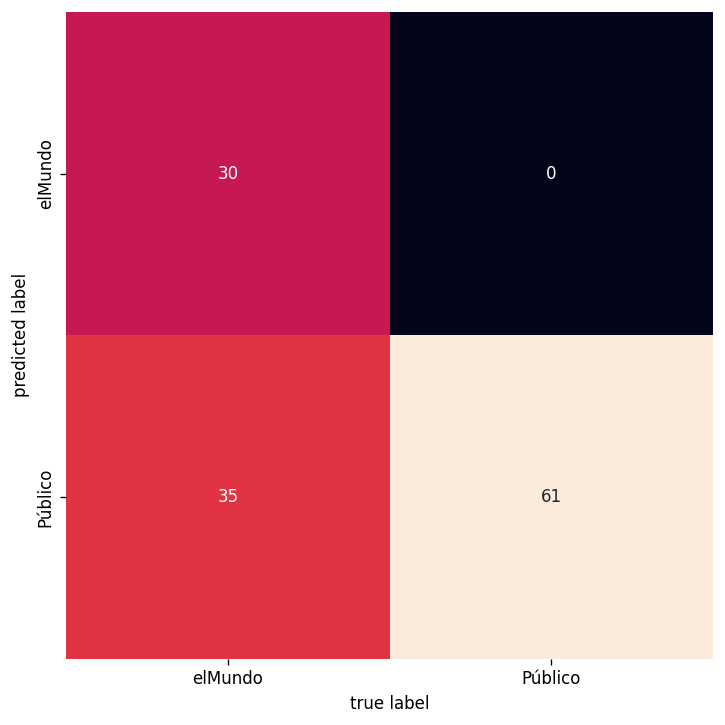

In [155]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['elMundo', 'Público'], yticklabels=['elMundo', 'Público'])
plt.xlabel('true label')
plt.ylabel('predicted label')

## 3. Reducción de la dimensionalidad

¿Cuál es la relación entre la cantidad de features y la cantidad de casos de entrenamiento? De acuerdo a la maldición de la dimensionalidad esta relación es un problema.

Una de las técnicas más comunes para reducir dimensiones es utilizar "stopwords", una lista con las palabras de cada idioma que no tienen un peso semántico importante.

Entrenen nuevamente el modelo quitando las stopwords del español que se encuentran en el archivo "stopwords.csv". ¿Qué pasa con la cantidad de dimensiones de la matriz de features? ¿Y con el accuracy?

In [156]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtener las stopwords en español
stopwords_es = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /home/jips/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [157]:
from unidecode import unidecode

# Crear un DataFrame con las stopwords
df_stopwords = pd.DataFrame(stopwords_es, columns=['stopword'])

# Aplicar unidecode para quitar acentos a la columna 'stopword'
df_stopwords['stopword'] = df_stopwords['stopword'].apply(unidecode)
df_stopwords

,stopword
0,de
1,la
2,que
3,el
4,en
...,...
308,tenido
309,tenida
310,tenidos
311,tenidas


In [158]:
# Es importante que las stopwords se encuentren en una lista
stopwords = list(df_stopwords['stopword'])

In [159]:
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'mas',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'si',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'tambien',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mi',
 'antes',
 'algunos',
 'que',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'el',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tu',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mio',
 'mia',
 'mios',
 'mias',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [160]:
# Sólo para chequear el tamaño de la matriz de features
m1 = TfidfVectorizer(stop_words = list(stopwords))
X_train_vec = m1.fit_transform(X_train)
X_train_vec.shape

(253, 16800)

In [161]:
model = make_pipeline(TfidfVectorizer(stop_words = list(stopwords)), MultinomialNB())

In [162]:
model.fit(X_train, y_train)
labels = model.predict(X_test)

In [163]:
labels

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [164]:
import numpy as np

# Contar los valores distintos de cero en el array
num_distinct = np.count_nonzero(labels)

# Imprimir el número de valores distintos de cero
print("Número de valores distintos de cero:", num_distinct)
print("Número total de valores:", len(labels))

Número de valores distintos de cero: 74
Número total de valores: 126


In [165]:
accuracy_score(y_test, labels)

0.8968253968253969

Text(255.26666666666674, 0.5, 'predicted label')

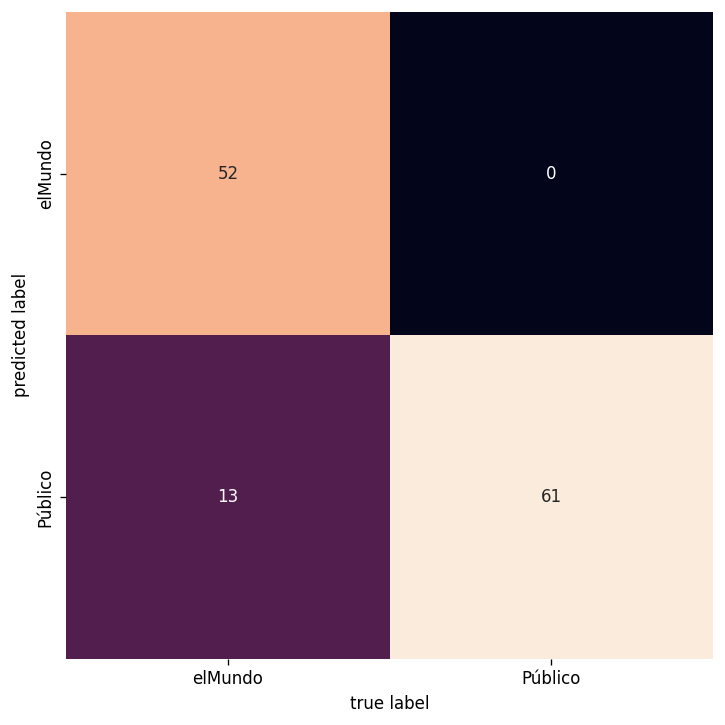

In [166]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['elMundo', 'Público'], yticklabels=['elMundo', 'Público'])
plt.xlabel('true label')
plt.ylabel('predicted label')

## 4. Avanzando en la reducción de dimensiones

El modelo mejora cuando quitamos las stopwords pero todavía tenemos una cantidad de dimensiones demasiado alta para 
la cantidad de datos que tenemos.

Pensemos lo siguiente ¿Qué valor tienen las palabras que aparecen una o dos veces en todo el corpus a la hora de discriminar? Para quitar del análisis las palabras que ocurren menos de determinada cantidad de veces, la clase TfidfVectorizer tiene un parámetro min_df. 

Ponemos el parámetro min_df en 6 y volvemos a ejecutar el modelo.

¿A cuánto se reduce la dimensión de la matriz de features?

¿Cuánto mejora la performance del algoritmo?

In [167]:
model = make_pipeline(TfidfVectorizer(stop_words = list(stopwords), min_df=6), MultinomialNB())

In [168]:
model.fit(X_train, y_train)
labels = model.predict(X_test)

In [169]:
import numpy as np

# Contar los valores distintos de cero en el array
num_distinct = np.count_nonzero(labels)

# Imprimir el número de valores distintos de cero
print("Número de valores distintos de cero:", num_distinct)
print("Número total de valores:", len(labels))

Número de valores distintos de cero: 61
Número total de valores: 126


In [170]:
model_vec2 = TfidfVectorizer(stop_words = list(stopwords), min_df=10)

In [171]:
X_train_vec = model_vec2.fit_transform(X_train)

In [172]:
X_train_vec.shape

(253, 1571)

In [173]:
accuracy_score(y_test, labels)

0.9523809523809523

Text(255.26666666666674, 0.5, 'predicted label')

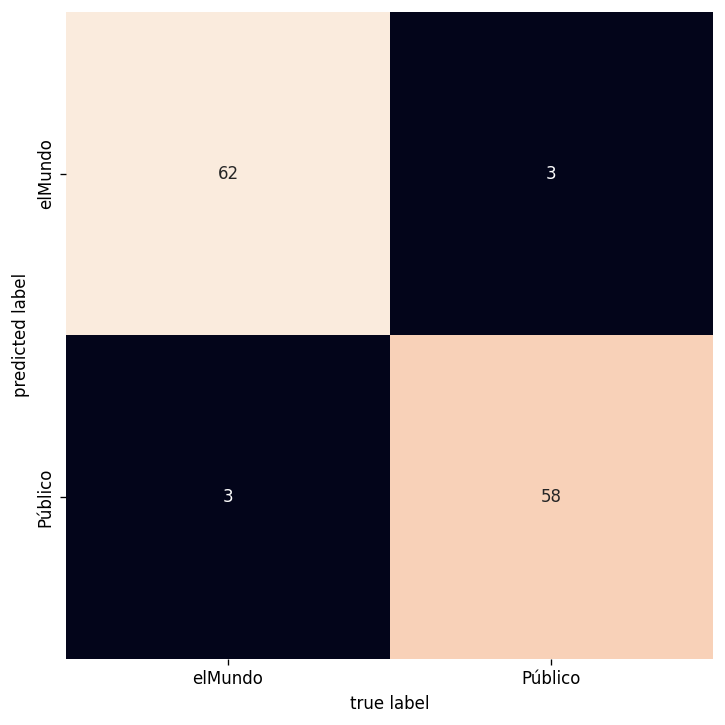

In [174]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['elMundo', 'Público'], yticklabels=['elMundo', 'Público'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [175]:
pred = model.predict(['Tres años de legislatura y cinco crisis de Gobierno. Pedro Sánchez ha acometido una nueva remodelación de su Ejecutivo por la salida de las ministras Reyes Maroto y Carolina Darias como candidatas a los ayuntamientos de Madrid y Las Palmas de Gran Canarias, respectivamente. Cambios que se han limitado a los departamentos de Industria y Sanidad: Héctor Gómez ha sido el elegido para sustituir a Maroto en Industria y José Miñones es el nuevo ministro de Sanidad en lugar de Darias.'])
print('elMundo' if pred[0] == 0 else 'Público')

elMundo


In [176]:
pred = model.predict(['El presidente del Partido Popular ha valorado ya los cambios en el Gobierno anunciados por Pedro Sánchez a primera hora de este lunes. Alberto Núñez Feijóo cree que el nombramiento de José Manuel Miñones como ministro de Sanidad es "probablemente" una "decisión orgánica" del Partido Socialista para buscar "un candidato a la presidencia de la Xunta que parece ser que no tiene". Así lo ha dicho a la salida de un desayuno informativo en Madrid con el candidato a la presidencia de Castilla y La Mancha'])
print('elMundo' if pred[0] == 0 else 'Público')

Público
